In [16]:
## f"{}"
## pandas merge, join, concatenate 
## pd.concat(), a useful shortcut is pd.append()
## low peformance 
## pd.merge(left, right, how = 'inner'), with a dataframe style join 
## high performance in-memory join operations, very similar to SQL
## pd.DataFrame.join(), left.join(right, how = 'inner'), join columns of anther DataFrame 

In [1]:
from __future__ import division, print_function, unicode_literals
## to support both python2 and python3

import os 
import numpy as np 
np.random.seed(42)
%matplotlib inline 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import pandas as pd 
import sklearn

import warnings
warnings.filterwarnings(action='ignore', message='^internal gelsd')
## ignore useless warning(see SciPy issue #5998)

In [2]:
PROJECT_ROOT_DIR = '.'
CHAPTER_ID = '01'
def safe_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, 'img', CHAPTER_ID, fig_id + '.png')
    print('saving figures', fig_id)
    if tight_layout: 
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [3]:
oecd_bli = pd.read_csv('dataset/lifesat/oecd_bli_2015.csv', thousands=',')
gdp_per_capita = pd.read_csv('dataset/lifesat/gdp_per_capita.csv',  thousands=',', delimiter = '\t',
                             encoding = 'latin1', na_values='n/a' )
## thousands separator: number
## delimiter separator: sep 
## standard encoding: file 
## na_values: represent missing value
## Organisation for Economic Co-operation and Development, better life index 

In [5]:
gdp_per_capita.head()

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
0,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
1,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
2,Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
3,Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
4,Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0


In [6]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]
## OECD better life index 

In [7]:
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats['GDP per capita']]
y = np.c_[country_stats['Life satisfaction']]
## concatenation along the second axis.

In [10]:
from sklearn import linear_model
lin_reg_model = linear_model.LinearRegression()

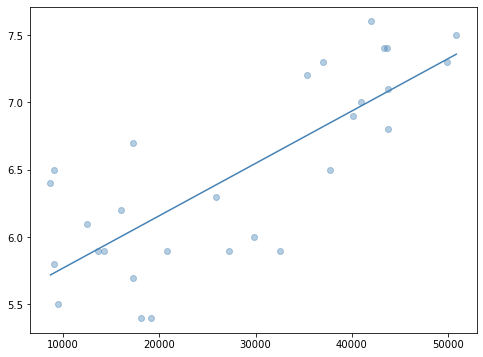

In [14]:
lin_reg_model.fit(X, y)

plt.figure(figsize=(8, 6))
plt.scatter(X, y, alpha=0.4, color='steelblue')
_=plt.plot(X, lin_reg_model.predict(X), color='steelblue' )

In [15]:
X_new = [[22587]]
lin_reg_model.predict(X_new)

array([[6.25984414]])